# hepatitis tvae stacking

Training on hepatitis dataset using tvae model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hepatitis data
data_real = pd.read_csv("Data\HCV-Egy-Data.csv")
data_real = data_real.dropna()
gen_method = "tvae"
target = "Baselinehistological staging"


In [3]:
# Split hepatitis data into 80/20 train and test
data_train, data_test = train_test_split(data_real, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv("Data\HCV_train.csv", index=False)
data_test.to_csv("Data\HCV_test.csv", index=False)


In [3]:
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v1.csv", key="synth")

[2024-05-16T15:56:04.619618+0200][3504][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 30%|███       | 300/1000 [03:09<07:23,  1.58it/s]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
0       35       2   35      2               2          2          2   
1       57       2   24      2               2          1          1   
2       55       1   30      2               2          1          2   
3       61       2   23      2               2          1          2   
4       57       1   29      1               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
1103    61       2   22      2               1          1          1   
1104    42       2   32      2               1          1          2   
1105    42       1   28      2               2          2          1   
1106    52       2   28      2               2          2          1   
1107    51       1   35      2               1          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
0                                    1          

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v1.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v1_test.csv", index=False)

In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v2.csv", key="synth")

[2024-05-16T15:59:20.259677+0200][3504][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 30%|███       | 300/1000 [06:30<15:11,  1.30s/it]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
315     37       1   35      2               1          1          1   
1869    42       2   30      1               2          1          2   
1576    51       1   34      2               2          2          2   
1336    35       2   35      2               1          1          1   
655     37       2   31      1               1          1          1   
...    ...     ...  ...    ...             ...        ...        ...   
1638    57       2   33      1               2          1          2   
1095    61       2   22      2               1          1          1   
1130    42       2   32      2               1          1          2   
1294    42       1   28      2               2          2          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
315                                  2          

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v2.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v2_test.csv", index=False)

In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v3.csv", key="synth")

[2024-05-16T16:05:55.046404+0200][3504][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 30%|███       | 300/1000 [12:38<29:28,  2.53s/it]


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
4194    34       1   23      1               2          1          1   
2389    49       2   23      2               2          2          2   
2561    56       2   28      1               1          1          1   
5344    57       2   28      1               2          1          2   
3690    56       1   23      2               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
3772    48       2   32      2               2          2          2   
5191    56       1   23      2               1          1          2   
5226    36       2   23      2               2          1          1   
5390    34       1   23      1               2          1          1   
860     52       2   28      2               2          2          1   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
4194                                 1          

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v3.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v4.csv", key="synth")

[2024-05-16T16:18:39.452490+0200][3504][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 35%|███▌      | 350/1000 [30:58<57:31,  5.31s/it]  


[{'train':       Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
9729    42       2   24      2               1          1          1   
4720    42       2   23      2               2          1          1   
474     41       1   31      2               1          1          2   
4874    49       1   23      1               2          1          1   
2391    43       1   24      1               1          2          2   
...    ...     ...  ...    ...             ...        ...        ...   
5734    56       1   33      1               2          1          1   
5191    56       1   23      2               1          1          2   
5390    34       1   23      1               2          1          1   
860     52       2   28      2               2          2          1   
7270    55       2   33      1               1          1          2   

      Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
9729                                 2          

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\HCV_stack_v4.csv", index=False)

# Split synth data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_syn_v5.csv", key="synth")

[2024-05-16T16:49:48.599683+0200][3504][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 35%|███▌      | 350/1000 [1:04:02<1:58:55, 10.98s/it]


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
8704     56       2   22      1               2          2          1   
558      34       1   25      1               2          1          1   
6959     48       1   27      1               1          1          1   
20195    34       1   33      2               1          1          2   
20145    42       2   26      2               2          1          2   
...     ...     ...  ...    ...             ...        ...        ...   
11964    57       1   27      2               2          2          1   
21575    34       2   32      2               1          1          1   
5390     34       1   23      1               2          1          1   
860      52       2   28      2               2          2          1   
15795    55       2   33      2               1          1          2   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
8704                               

# stack_synth_only

In [13]:
# Remove the first 1385 rows, equal to the number of real data, from stack_v4
data_stack_synth_only = data_stack.iloc[1385:, :]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\HCV_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, train_size=0.8, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\HCV_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\HCV_stack_synth_only_test.csv", index=False)

# syn_synth_only

In [14]:
# Synthesize data
gen_count = data_stack_synth_only.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\HCV_synth_only_syn_.csv", key="synth")

[2024-05-16T17:54:23.305414+0200][3504][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 35%|███▌      | 350/1000 [1:00:02<1:51:30, 10.29s/it]


[{'train':        Age   Gender  BMI  Fever  Nausea/Vomting  Headache   Diarrhea   \
7889     34       1   32      2               1          2          2   
11634    34       1   24      2               2          1          1   
20750    55       1   29      2               2          1          2   
3329     42       2   33      2               2          1          1   
18793    42       2   29      1               2          1          2   
...     ...     ...  ...    ...             ...        ...        ...   
12669    42       1   28      2               2          1          1   
13349    55       1   22      1               1          2          1   
6775     57       1   23      2               1          2          1   
2245     35       2   29      1               2          1          2   
17180    55       2   23      2               2          2          2   

       Fatigue & generalized bone ache   Jaundice   Epigastric pain   ...  \
7889                               

# Eval on syn_v1

In [4]:
# Read train and test from real data
data_train = pd.read_csv("Data\HCV_train.csv")
data_test = pd.read_csv("Data\HCV_test.csv")

# Count of real_data
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.015805,0.002556,0.984195,0.002556
1,pca_eigval_diff,u,0.025625,NaN,0.974375,NaN
2,pca_eigvec_ang,u,0.507582,NaN,0.838432,NaN
3,avg_cio,u,0.344321,0.091008,0.344321,0.091008
4,corr_mat_diff,u,0.938404,NaN,0.997689,NaN
5,mutual_inf_diff,u,2.051170,NaN,0.994948,NaN
6,ks_tvd_stat,u,0.094432,0.012480,0.905568,0.012480
7,frac_ks_sigs,u,0.655172,NaN,0.344828,NaN
8,avg_h_dist,u,0.004764,0.001732,0.995236,0.001732
9,avg_pMSE,u,0.008605,0.000266,0.965579,0.001064


# Eval on syn_v2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.024878,0.002555,0.975122,0.002555
1,pca_eigval_diff,u,0.027386,NaN,0.972614,NaN
2,pca_eigvec_ang,u,0.420254,NaN,0.866229,NaN
3,avg_cio,u,0.197061,0.072770,0.197061,0.072770
4,corr_mat_diff,u,0.959270,NaN,0.997637,NaN
5,mutual_inf_diff,u,2.713827,NaN,0.993316,NaN
6,ks_tvd_stat,u,0.124112,0.013243,0.875888,0.013243
7,frac_ks_sigs,u,0.827586,NaN,0.172414,NaN
8,avg_h_dist,u,0.010076,0.003152,0.989924,0.003152
9,avg_pMSE,u,0.018119,0.001405,0.927525,0.005621


# Eval on syn_v3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.029457,0.002560,0.970543,0.002560
1,pca_eigval_diff,u,0.026740,NaN,0.973260,NaN
2,pca_eigvec_ang,u,0.543077,NaN,0.827133,NaN
3,avg_cio,u,0.246665,0.084158,0.246665,0.084158
4,corr_mat_diff,u,1.123474,NaN,0.997233,NaN
5,mutual_inf_diff,u,3.239417,NaN,0.992021,NaN
6,ks_tvd_stat,u,0.137553,0.013934,0.862447,0.013934
7,frac_ks_sigs,u,0.862069,NaN,0.137931,NaN
8,avg_h_dist,u,0.013471,0.004674,0.986529,0.004674
9,avg_pMSE,u,0.025262,0.000770,0.898950,0.003079


# Eval on syn_v4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.039464,0.002568,0.960536,0.002568
1,pca_eigval_diff,u,0.022138,NaN,0.977862,NaN
2,pca_eigvec_ang,u,0.554031,NaN,0.823646,NaN
3,avg_cio,u,0.153150,0.068665,0.153150,0.068665
4,corr_mat_diff,u,1.066138,NaN,0.997374,NaN
5,mutual_inf_diff,u,3.883254,NaN,0.990435,NaN
6,ks_tvd_stat,u,0.157859,0.016894,0.842141,0.016894
7,frac_ks_sigs,u,0.827586,NaN,0.172414,NaN
8,avg_h_dist,u,0.012614,0.004585,0.987386,0.004585
9,avg_pMSE,u,0.040329,0.001929,0.838685,0.007716


# Eval on syn_v5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\HCV_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.047202,0.002575,0.952798,0.002575
1,pca_eigval_diff,u,0.022570,NaN,0.977430,NaN
2,pca_eigvec_ang,u,0.709990,NaN,0.774003,NaN
3,avg_cio,u,0.157696,0.074263,0.157696,0.074263
4,corr_mat_diff,u,1.192182,NaN,0.997064,NaN
5,mutual_inf_diff,u,4.138691,NaN,0.989806,NaN
6,ks_tvd_stat,u,0.161137,0.017391,0.838863,0.017391
7,frac_ks_sigs,u,0.827586,NaN,0.172414,NaN
8,avg_h_dist,u,0.012273,0.004400,0.987727,0.004400
9,avg_pMSE,u,0.049380,0.001224,0.802481,0.004896


# Eval on synth_only_stack

In [13]:
# Read synth_only_syn data
syn_sample = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv", index=False)

In [14]:
# Read synth_only_syn_sample
data_syn = pd.read_csv(f"{gen_method}\HCV_synth_only_syn_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.042926,0.002572,0.957074,0.002572
1,pca_eigval_diff,u,0.029508,NaN,0.970492,NaN
2,pca_eigvec_ang,u,0.586558,NaN,0.813293,NaN
3,avg_cio,u,0.204409,0.073674,0.204409,0.073674
4,corr_mat_diff,u,1.172696,NaN,0.997112,NaN
5,mutual_inf_diff,u,4.461613,NaN,0.989011,NaN
6,ks_tvd_stat,u,0.167149,0.016585,0.832851,0.016585
7,frac_ks_sigs,u,0.862069,NaN,0.137931,NaN
8,avg_h_dist,u,0.015378,0.004996,0.984622,0.004996
9,avg_pMSE,u,0.047467,0.001852,0.810132,0.007410


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.157040,0.205453,0.605755
res_stack_v1,0.107401,0.199925,0.469065
res_stack_v2,0.116426,0.199452,0.408633
res_stack_v3,0.074910,0.200573,0.336691
res_stack_v4,0.067690,0.197311,0.274820
res_stack_synth_only,0.042419,0.197709,0.197122


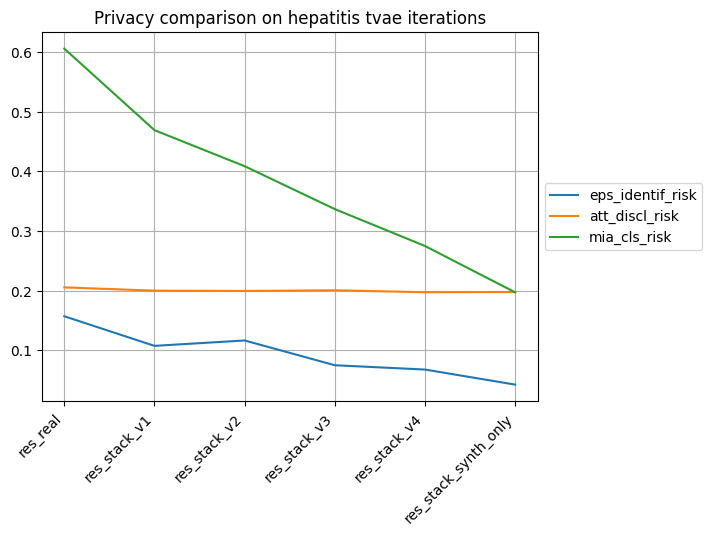

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on hepatitis tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,1.066571
res_stack_v1,1.105150
res_stack_v2,1.107638
res_stack_v3,1.129741
res_stack_v4,1.151620
res_stack_synth_only,1.181713


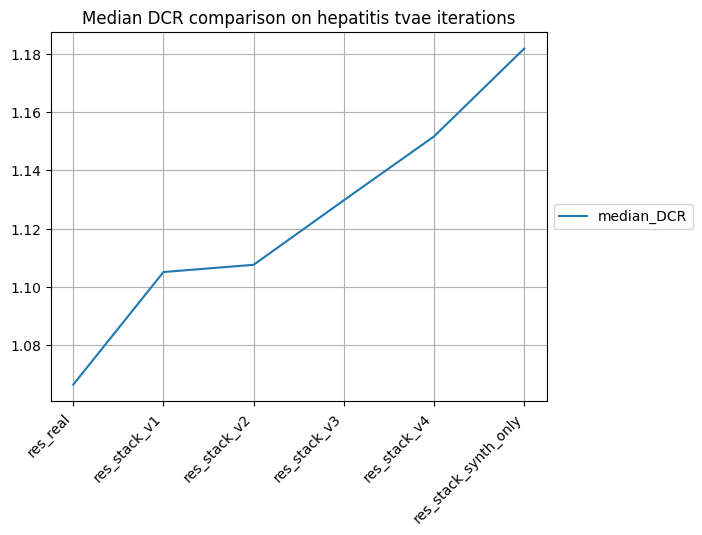

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on hepatitis tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.015805,0.008605,0.028677
res_stack_v1,0.024878,0.018119,0.043086
res_stack_v2,0.029457,0.025262,0.025016
res_stack_v3,0.039464,0.040329,0.015381
res_stack_v4,0.047202,0.049380,0.027742
res_stack_synth_only,0.042926,0.047467,0.029794


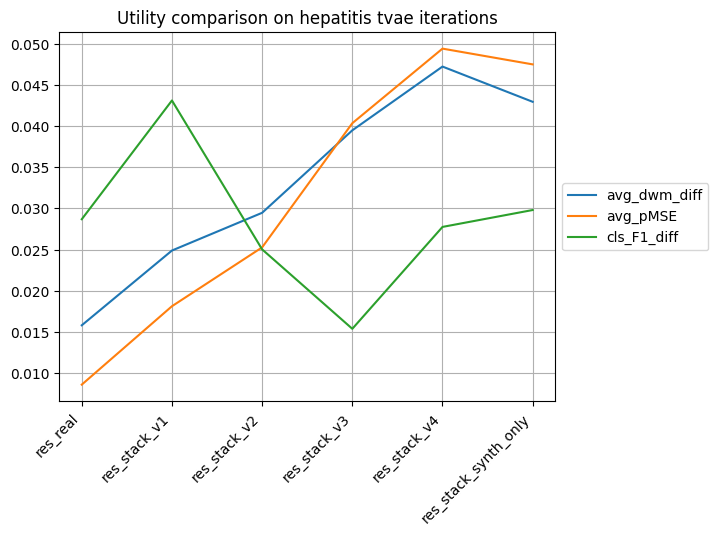

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on hepatitis tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,0.938404
res_stack_v1,0.959270
res_stack_v2,1.123474
res_stack_v3,1.066138
res_stack_v4,1.192182
res_stack_synth_only,1.172696


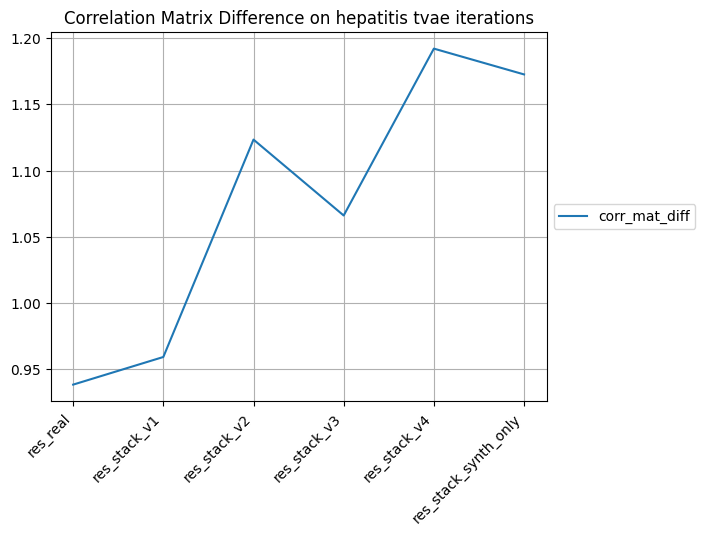

In [24]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on hepatitis tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,avg_nndr,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.015805,0.025625,0.507582,0.344321,0.938404,2.051170,0.094432,0.655172,0.004764,0.008605,0.909073,0.017751,0.588357,-0.022714,0.028677,0.038809,0.0,0.157040,0.605755,0.205453
res_stack_v1,0.024878,0.027386,0.420254,0.197061,0.959270,2.713827,0.124112,0.827586,0.010076,0.018119,0.914693,0.003779,0.650361,-0.066245,0.043086,0.022563,0.0,0.107401,0.469065,0.199925
res_stack_v2,0.029457,0.026740,0.543077,0.246665,1.123474,3.239417,0.137553,0.862069,0.013471,0.025262,0.919795,-0.004822,0.709386,-0.102286,0.025016,0.026173,0.0,0.116426,0.408633,0.199452
res_stack_v3,0.039464,0.022138,0.554031,0.153150,1.066138,3.883254,0.157859,0.827586,0.012614,0.040329,0.922139,0.004359,0.754513,-0.092960,0.015381,0.037906,0.0,0.074910,0.336691,0.200573
res_stack_v4,0.047202,0.022570,0.709990,0.157696,1.192182,4.138691,0.161137,0.827586,0.012273,0.049380,0.926369,0.004818,0.782852,-0.120217,0.027742,0.033394,0.0,0.067690,0.274820,0.197311
res_stack_synth_only,0.042926,0.029508,0.586558,0.204409,1.172696,4.461613,0.167149,0.862069,0.015378,0.047467,0.922780,0.002744,0.790072,-0.092840,0.029794,0.024368,0.0,0.042419,0.197122,0.197709


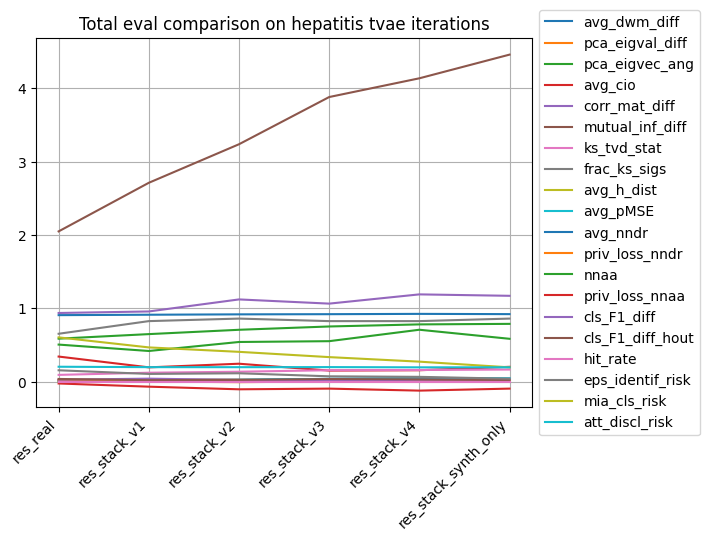

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on hepatitis tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.822256,0.836066
1,res_stack_v1,0.788594,0.858827
2,res_stack_v2,0.779395,0.861425
3,res_stack_v3,0.764295,0.877947
4,res_stack_v4,0.754330,0.884976
5,res_stack_synth_only,0.757899,0.902242


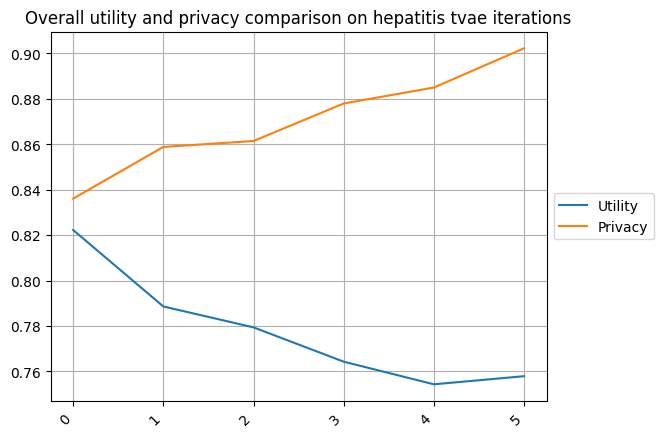

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on hepatitis tvae iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()